In [1]:
from modules.OrderedClustering import OrderedClustering
from modules.DataPreprocessor import DataPreprocessor
from modules.ANNModel import ANNModel

In [2]:
import pandas as pd
from keras.callbacks import EarlyStopping

# **Flood Total Duration (Minutes)**

In [3]:
filename = 'dataset/KS_NV_VA_flash_flood_td.csv'
data = pd.read_csv(filename)
data

,State,County,Year,Month,Flash Flood Total Duration (Minutes),DSCI,None,D0,D1,D2,...,Planar Curvature Median,Planar Curvature Pct90,Profile Curvature Min,Profile Curvature Max,Profile Curvature Range,Profile Curvature Mean,Profile Curvature Std,Profile Curvature Sum,Profile Curvature Median,Profile Curvature Pct90
0,VA,Appomattox County,2010,1,136,0,100.000000,0.000000,0.0,0.0,...,294750816.0,3.146490e+09,-4.776859e+10,5.705438e+10,1.050000e+11,6.701598e+07,3.519920e+09,7.680000e+13,-332194912.0,3.746295e+09
1,VA,Augusta County,2010,1,710,0,100.000000,0.000000,0.0,0.0,...,157697392.0,3.465791e+09,-3.956919e+10,4.348402e+10,8.305321e+10,1.455832e+08,3.540391e+09,4.880000e+14,15378728.0,3.376817e+09
2,VA,Bath County,2010,1,142,0,100.000000,0.000000,0.0,0.0,...,208110000.0,5.948474e+09,-4.836821e+10,6.745287e+10,1.160000e+11,2.062278e+08,5.431594e+09,3.800000e+14,0.0,5.823914e+09
3,VA,Botetourt County,2010,1,845,0,100.000000,0.000000,0.0,0.0,...,267952192.0,5.407946e+09,-5.651770e+10,6.560464e+10,1.220000e+11,2.361656e+08,4.642131e+09,4.410000e+14,79725392.0,5.026470e+09
4,VA,Buckingham County,2010,1,76,0,100.000000,0.000000,0.0,0.0,...,264418016.0,2.952804e+09,-5.696386e+10,5.237183e+10,1.090000e+11,5.508241e+07,3.432519e+09,1.100000e+14,-330291104.0,3.485563e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2118,VA,Petersburg City,2022,10,0,32,67.741935,32.258065,0.0,0.0,...,0.0,1.498908e+09,-3.678475e+10,2.731465e+10,6.409940e+10,6.635044e+07,2.400872e+09,5.180000e+12,0.0,1.920294e+09
2119,VA,Craig County,2022,11,0,0,100.000000,0.000000,0.0,0.0,...,256084128.0,5.186850e+09,-4.387996e+10,4.733032e+10,9.121028e+10,1.555282e+08,4.858629e+09,1.750000e+14,14857759.0,4.957114e+09
2120,VA,Warren County,2022,11,0,23,76.666667,23.333333,0.0,0.0,...,141682176.0,3.067703e+09,-3.428413e+10,3.345182e+10,6.773595e+10,1.221838e+08,3.040323e+09,9.280000e+13,-8667729.0,3.163780e+09
2121,VA,Charles City County,2022,12,0,27,72.989355,27.010645,0.0,0.0,...,0.0,7.995387e+08,-1.921977e+10,1.914278e+10,3.836256e+10,3.151597e+07,1.352950e+09,2.200000e+13,0.0,1.107394e+09


In [4]:
target_col = data['Flash Flood Total Duration (Minutes)']
target_col_name = 'Flash Flood Total Duration (Minutes)'
max_iter = 10
n_init = 100
n_classes = 5

In [5]:
ordered_clustering = OrderedClustering(target_col, max_iter, n_init)

In [6]:
cluster_results, inertia_results = ordered_clustering.clustering()

----------------------------------------
Number of Clusters: 1

Inertia: 20723285569.66276

Silhouette Score: 0 (Only one unique label)

Cluster Centers (sorted by ascending means):
Cluster 1: 916.253414978806

Sorted and Relabeled Clusters (unique points):
Cluster 1: [0, 1, 5, 10, 15, 20, 21, 23, 26, 28, 29, 30, 31, 35, 40, 41, 45, 46, 49, 50, 52, 53, 54, 57, 58, 60, 61, 62, 64, 66, 67, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 89, 90, 91, 92, 93, 95, 97, 98, 99, 100, 101, 102, 103, 104, 105, 109, 110, 113, 114, 115, 116, 118, 119, 120, 121, 122, 124, 125, 126, 127, 128, 130, 132, 133, 134, 135, 136, 137, 140, 141, 142, 144, 145, 147, 148, 150, 152, 155, 158, 160, 161, 162, 164, 165, 167, 168, 169, 170, 172, 173, 174, 175, 177, 178, 179, 180, 181, 183, 185, 187, 188, 189, 190, 193, 194, 195, 197, 200, 203, 205, 206, 210, 212, 215, 216, 217, 218, 220, 222, 223, 225, 226, 227, 228, 229, 230, 232, 234, 235, 237, 238, 240, 241, 242, 243, 244, 245, 248, 249, 2

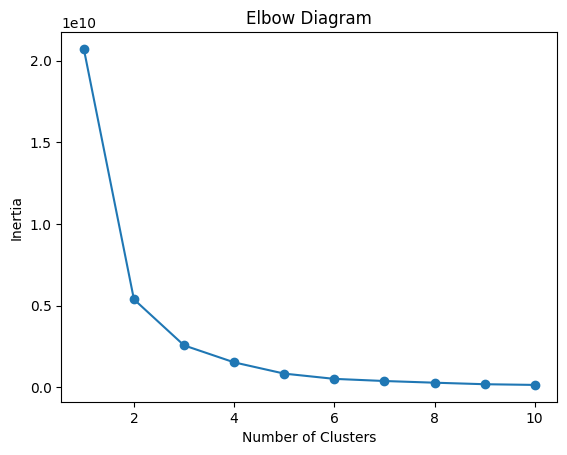

In [7]:
ordered_clustering.elbow_diagram(inertia_results)

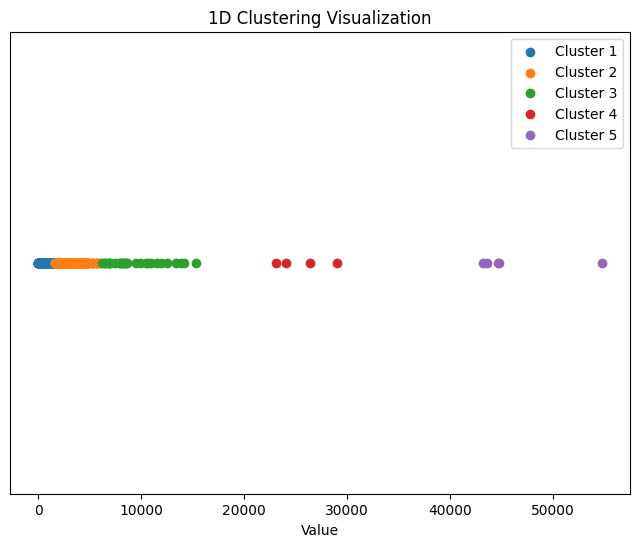

In [8]:
ordered_clustering.plot_clusters(cluster_results[n_classes - 1])

In [9]:
data[target_col_name + ' Relabeled'] = ordered_clustering.relabel(cluster_results[n_classes - 1])
data

,State,County,Year,Month,Flash Flood Total Duration (Minutes),DSCI,None,D0,D1,D2,...,Planar Curvature Pct90,Profile Curvature Min,Profile Curvature Max,Profile Curvature Range,Profile Curvature Mean,Profile Curvature Std,Profile Curvature Sum,Profile Curvature Median,Profile Curvature Pct90,Flash Flood Total Duration (Minutes) Relabeled
0,VA,Appomattox County,2010,1,136,0,100.000000,0.000000,0.0,0.0,...,3.146490e+09,-4.776859e+10,5.705438e+10,1.050000e+11,6.701598e+07,3.519920e+09,7.680000e+13,-332194912.0,3.746295e+09,1
1,VA,Augusta County,2010,1,710,0,100.000000,0.000000,0.0,0.0,...,3.465791e+09,-3.956919e+10,4.348402e+10,8.305321e+10,1.455832e+08,3.540391e+09,4.880000e+14,15378728.0,3.376817e+09,1
2,VA,Bath County,2010,1,142,0,100.000000,0.000000,0.0,0.0,...,5.948474e+09,-4.836821e+10,6.745287e+10,1.160000e+11,2.062278e+08,5.431594e+09,3.800000e+14,0.0,5.823914e+09,1
3,VA,Botetourt County,2010,1,845,0,100.000000,0.000000,0.0,0.0,...,5.407946e+09,-5.651770e+10,6.560464e+10,1.220000e+11,2.361656e+08,4.642131e+09,4.410000e+14,79725392.0,5.026470e+09,1
4,VA,Buckingham County,2010,1,76,0,100.000000,0.000000,0.0,0.0,...,2.952804e+09,-5.696386e+10,5.237183e+10,1.090000e+11,5.508241e+07,3.432519e+09,1.100000e+14,-330291104.0,3.485563e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2118,VA,Petersburg City,2022,10,0,32,67.741935,32.258065,0.0,0.0,...,1.498908e+09,-3.678475e+10,2.731465e+10,6.409940e+10,6.635044e+07,2.400872e+09,5.180000e+12,0.0,1.920294e+09,1
2119,VA,Craig County,2022,11,0,0,100.000000,0.000000,0.0,0.0,...,5.186850e+09,-4.387996e+10,4.733032e+10,9.121028e+10,1.555282e+08,4.858629e+09,1.750000e+14,14857759.0,4.957114e+09,1
2120,VA,Warren County,2022,11,0,23,76.666667,23.333333,0.0,0.0,...,3.067703e+09,-3.428413e+10,3.345182e+10,6.773595e+10,1.221838e+08,3.040323e+09,9.280000e+13,-8667729.0,3.163780e+09,1
2121,VA,Charles City County,2022,12,0,27,72.989355,27.010645,0.0,0.0,...,7.995387e+08,-1.921977e+10,1.914278e+10,3.836256e+10,3.151597e+07,1.352950e+09,2.200000e+13,0.0,1.107394e+09,1


In [10]:
for label, cluster in cluster_results[n_classes - 1]:
    print(f"Cluster {label}: {list(cluster)}")

Cluster 1: [0, 1, 5, 10, 15, 20, 21, 23, 26, 28, 29, 30, 31, 35, 40, 41, 45, 46, 49, 50, 52, 53, 54, 57, 58, 60, 61, 62, 64, 66, 67, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 89, 90, 91, 92, 93, 95, 97, 98, 99, 100, 101, 102, 103, 104, 105, 109, 110, 113, 114, 115, 116, 118, 119, 120, 121, 122, 124, 125, 126, 127, 128, 130, 132, 133, 134, 135, 136, 137, 140, 141, 142, 144, 145, 147, 148, 150, 152, 155, 158, 160, 161, 162, 164, 165, 167, 168, 169, 170, 172, 173, 174, 175, 177, 178, 179, 180, 181, 183, 185, 187, 188, 189, 190, 193, 194, 195, 197, 200, 203, 205, 206, 210, 212, 215, 216, 217, 218, 220, 222, 223, 225, 226, 227, 228, 229, 230, 232, 234, 235, 237, 238, 240, 241, 242, 243, 244, 245, 248, 249, 250, 251, 252, 253, 255, 259, 260, 267, 268, 269, 270, 271, 272, 273, 274, 275, 278, 279, 280, 283, 285, 287, 288, 292, 296, 297, 300, 303, 306, 307, 309, 310, 312, 313, 314, 315, 317, 320, 322, 323, 327, 328, 329, 330, 331, 335, 337, 339, 340, 344, 345, 347,

In [11]:
data_preprocessor = DataPreprocessor(cluster_results[n_classes - 1], data, target_col_name)

In [12]:
X, y = data_preprocessor.X_and_y()

In [13]:
X

,DSCI,None,D1,D2,D3,PCP Value,PCP Rank,PCP Anomaly (1901-2000 base period),TMAX Value,1901-2000 TMAX Mean,...,Planar Curvature Mean,Planar Curvature Std,Planar Curvature Median,Planar Curvature Pct90,Profile Curvature Min,Profile Curvature Max,Profile Curvature Range,Profile Curvature Mean,Profile Curvature Std,Profile Curvature Pct90
0,0,100.000000,0.0,0.0,0.0,4.38,106,1.0114,43.2,45.2,...,6.852540e+07,3.209239e+09,294750816.0,3.146490e+09,-4.776859e+10,5.705438e+10,1.050000e+11,6.701598e+07,3.519920e+09,3.746295e+09
1,0,100.000000,0.0,0.0,0.0,4.29,112,1.2949,37.1,40.8,...,1.449158e+08,3.558302e+09,157697392.0,3.465791e+09,-3.956919e+10,4.348402e+10,8.305321e+10,1.455832e+08,3.540391e+09,3.376817e+09
2,0,100.000000,0.0,0.0,0.0,4.29,106,1.0579,35.4,40.5,...,2.082542e+08,5.413818e+09,208110000.0,5.948474e+09,-4.836821e+10,6.745287e+10,1.160000e+11,2.062278e+08,5.431594e+09,5.823914e+09
3,0,100.000000,0.0,0.0,0.0,4.69,114,1.4789,38.9,43.7,...,2.344259e+08,4.876742e+09,267952192.0,5.407946e+09,-5.651770e+10,6.560464e+10,1.220000e+11,2.361656e+08,4.642131e+09,5.026470e+09
4,0,100.000000,0.0,0.0,0.0,3.93,96,0.5552,44.0,46.0,...,5.517197e+07,3.090377e+09,264418016.0,2.952804e+09,-5.696386e+10,5.237183e+10,1.090000e+11,5.508241e+07,3.432519e+09,3.485563e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2118,32,67.741935,0.0,0.0,0.0,2.60,56,-0.4017,68.2,70.8,...,6.378036e+07,1.905357e+09,0.0,1.498908e+09,-3.678475e+10,2.731465e+10,6.409940e+10,6.635044e+07,2.400872e+09,1.920294e+09
2119,0,100.000000,0.0,0.0,0.0,4.75,115,1.9980,55.5,53.8,...,1.558374e+08,4.990826e+09,256084128.0,5.186850e+09,-4.387996e+10,4.733032e+10,9.121028e+10,1.555282e+08,4.858629e+09,4.957114e+09
2120,23,76.666667,0.0,0.0,0.0,3.75,99,0.9817,57.7,53.9,...,1.166075e+08,2.856427e+09,141682176.0,3.067703e+09,-3.428413e+10,3.345182e+10,6.773595e+10,1.221838e+08,3.040323e+09,3.163780e+09
2121,27,72.989355,0.0,0.0,0.0,3.96,92,0.7762,51.4,49.9,...,3.118126e+07,1.052903e+09,0.0,7.995387e+08,-1.921977e+10,1.914278e+10,3.836256e+10,3.151597e+07,1.352950e+09,1.107394e+09


In [14]:
y

0       1
1       1
2       1
3       1
4       1
       ..
2118    1
2119    1
2120    1
2121    1
2122    1
Name: Flash Flood Total Duration (Minutes) Relabeled, Length: 2123, dtype: int64

In [15]:
X_train, X_test, y_train, y_test = data_preprocessor.pipeline(X, y)

In [16]:
folder = 'ann_tuning_flash_flood_td'

early_stopping = EarlyStopping(
    monitor='val_accuracy',  # Metric to monitor (e.g., validation loss)
    patience=100,  # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore the weights of the best-performing model
    )

In [17]:
ann_model = ANNModel(n_classes, X_train, X_test, y_train, y_test, folder, early_stopping)

INFO:tensorflow:Reloading Tuner from .\ann_tuning_flash_flood_td\tuner0.json
INFO:tensorflow:Oracle triggered exit
Results summary
Results in .\ann_tuning_flash_flood_td
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 00 summary
Hyperparameters:
num_layers: 3
units_0: 256
activation: relu
learning_rate: 0.001
units_1: 32
units_2: 32
Score: 0.8725274682044983

Trial 08 summary
Hyperparameters:
num_layers: 2
units_0: 320
activation: relu
learning_rate: 0.001
units_1: 160
units_2: 352
units_3: 448
units_4: 64
Score: 0.8712715864181518

Trial 07 summary
Hyperparameters:
num_layers: 2
units_0: 224
activation: relu
learning_rate: 0.001
units_1: 192
units_2: 96
units_3: 352
units_4: 224
Score: 0.8700156927108764

Trial 01 summary
Hyperparameters:
num_layers: 5
units_0: 224
activation: tanh
learning_rate: 0.001
units_1: 128
units_2: 128
units_3: 32
units_4: 32
Score: 0.866562020778656

Trial 02 summary
Hyperparameters:
num_layers: 3
units_0: 512
activation: tanh
l

In [18]:
ann_model.train_and_predict()

Epoch 1/200
7/7 [==============================] - 2s 80ms/step - loss: 1.4288 - accuracy: 0.3733 - val_loss: 1.4688 - val_accuracy: 0.3391
Epoch 2/200
7/7 [==============================] - 0s 15ms/step - loss: 1.1387 - accuracy: 0.7252 - val_loss: 1.3019 - val_accuracy: 0.4851
Epoch 3/200
7/7 [==============================] - 0s 14ms/step - loss: 0.9664 - accuracy: 0.7337 - val_loss: 1.1708 - val_accuracy: 0.5165
Epoch 4/200
7/7 [==============================] - 0s 19ms/step - loss: 0.7938 - accuracy: 0.7851 - val_loss: 1.0668 - val_accuracy: 0.5400
Epoch 5/200
7/7 [==============================] - 0s 13ms/step - loss: 0.6388 - accuracy: 0.8340 - val_loss: 0.9074 - val_accuracy: 0.6170
Epoch 6/200
7/7 [==============================] - 0s 15ms/step - loss: 0.5154 - accuracy: 0.8462 - val_loss: 0.8306 - val_accuracy: 0.6358
Epoch 7/200
7/7 [==============================] - 0s 14ms/step - loss: 0.4369 - accuracy: 0.8696 - val_loss: 0.7911 - val_accuracy: 0.6405
Epoch 8/200
7/7 [===

In [19]:
ann_model.evaluate()

20/20 [==============================] - 0s 3ms/step - loss: 1.4680 - accuracy: 0.8697
Test Loss: 1.4680348634719849
Test Accuracy: 0.8697017431259155


In [20]:
ann_model.scores()

Accuracy: 0.869701726844584
Precision: 0.4994251796313652
Recall: 0.3894712305238621
F1-Score: 0.42728174603174596


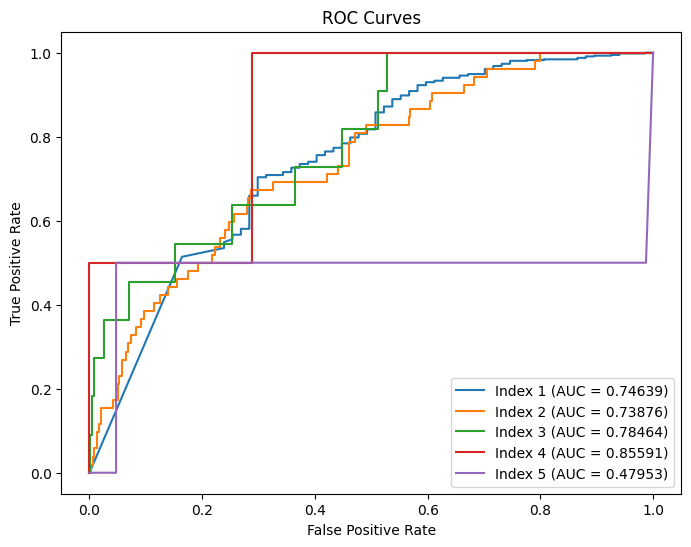

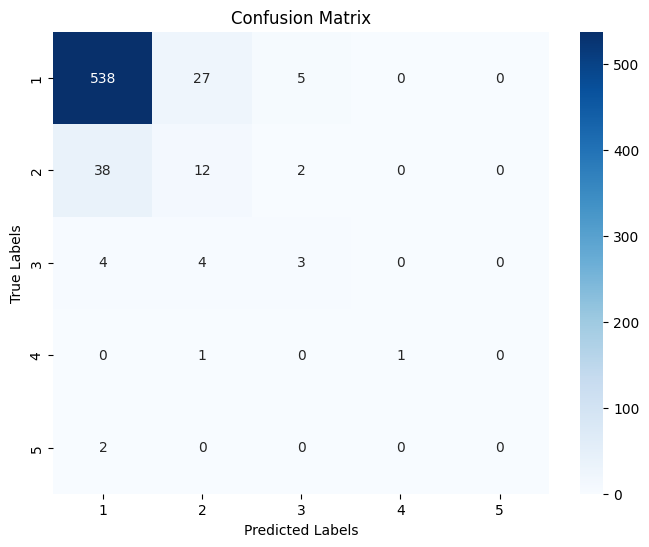

In [21]:
ann_model.figures()